In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pricedf = pd.read_csv('Dataset/SLR_sales.csv')
pricedf

,Advertising costs ($),Sales ($)
0,40,385
1,20,400
2,25,395
3,20,365
4,30,475
5,50,440
6,40,490
7,20,420
8,50,560
9,40,525


In [3]:
pricedf.shape

(12, 2)

In [4]:
x = pricedf.iloc[:,[0]].values
print(x)

[[40]
 [20]
 [25]
 [20]
 [30]
 [50]
 [40]
 [20]
 [50]
 [40]
 [25]
 [50]]


In [5]:
y = pricedf.iloc[:,-1].values
print(y)

[385 400 395 365 475 440 490 420 560 525 480 510]


In [6]:
pricedf.corr()

,Advertising costs ($),Sales ($)
Advertising costs ($),1.000000,0.634837
Sales ($),0.634837,1.000000


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print('Coefficients, beta:', regressor.coef_)
print('Contant, alpha:', regressor.predict([[0]]))

Coefficients, beta: [3.10425532]
Contant, alpha: [341.08510638]


In [9]:
y_pred = regressor.predict(x_test)
print(y_pred) # comparison predict
print(y_test) # and actual

[465.25531915 496.29787234 434.21276596]
[490 510 475]


In [10]:
corr = np.corrcoef(y_pred, y_test)
print(corr) # check correlation between predicted and actual.

[[1.        0.9966159]
 [0.9966159 1.       ]]


In [11]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)
print(MSE)

821.2153312207643


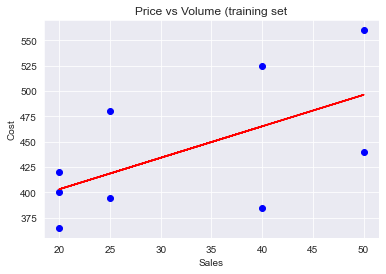

In [13]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, regressor.predict(x_train), color='red')
plt.title('Price vs Volume (training set')
plt.xlabel('Sales')
plt.ylabel('Cost')
plt.show()